In [515]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, timedelta
from pandas import DataFrame

In [516]:
def process(dfurl):

    dfcovid = pd.read_csv(dfurl)
    dfcovid = dfcovid.drop(['UID','iso2', 'iso3','code3', 'FIPS', 'Lat', 'Long_' , 'Country_Region', 'Combined_Key'], axis=1)
    dfcovid.rename(columns = {'Province_State':'State'} , inplace=True)
    dfcovid.rename(columns = {'Admin2':'County'} , inplace=True)
    dfcovid = dfcovid.fillna("NA")
    dfcovid = dfcovid.melt(['State', 'County'], var_name='Date', value_name='value')
    
    return dfcovid

In [517]:
urlconfirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
dfconfirmed = process(urlconfirmed)
dfconfirmed

,State,County,Date,value
0,Alabama,Autauga,1/22/20,0
1,Alabama,Baldwin,1/22/20,0
2,Alabama,Barbour,1/22/20,0
3,Alabama,Bibb,1/22/20,0
4,Alabama,Blount,1/22/20,0
...,...,...,...,...
704735,Wyoming,Teton,8/19/20,394
704736,Wyoming,Uinta,8/19/20,283
704737,Wyoming,Unassigned,8/19/20,0
704738,Wyoming,Washakie,8/19/20,104


In [518]:
dfconfirmed.rename(columns = {'value':'Confirmed'} , inplace=True)

In [519]:
urldead = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
dfdead = process(urldead)
dfdead

,State,County,Date,value
0,Alabama,Autauga,Population,55869
1,Alabama,Baldwin,Population,223234
2,Alabama,Barbour,Population,24686
3,Alabama,Bibb,Population,22394
4,Alabama,Blount,Population,57826
...,...,...,...,...
708075,Wyoming,Teton,8/19/20,0
708076,Wyoming,Uinta,8/19/20,0
708077,Wyoming,Unassigned,8/19/20,33
708078,Wyoming,Washakie,8/19/20,0


In [520]:
dfdead = dfdead[dfdead.Date != 'Population']

In [521]:
dfdead.rename(columns = {'value':'Dead'} , inplace=True)

C:\Users\ysman\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [522]:
dfdead

,State,County,Date,Dead
3340,Alabama,Autauga,1/22/20,0
3341,Alabama,Baldwin,1/22/20,0
3342,Alabama,Barbour,1/22/20,0
3343,Alabama,Bibb,1/22/20,0
3344,Alabama,Blount,1/22/20,0
...,...,...,...,...
708075,Wyoming,Teton,8/19/20,0
708076,Wyoming,Uinta,8/19/20,0
708077,Wyoming,Unassigned,8/19/20,33
708078,Wyoming,Washakie,8/19/20,0


In [523]:
dfconfirmed['Date'] = pd.to_datetime(dfconfirmed.Date)
dfdead['Date'] = pd.to_datetime(dfdead.Date)

C:\Users\ysman\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [524]:
uscovid = pd.merge(dfconfirmed, dfdead, how='left', left_on=['State', 'County','Date'], right_on = ['State','County', 'Date'])

In [525]:
uscovid

,State,County,Date,Confirmed,Dead
0,Alabama,Autauga,2020-01-22,0,0
1,Alabama,Baldwin,2020-01-22,0,0
2,Alabama,Barbour,2020-01-22,0,0
3,Alabama,Bibb,2020-01-22,0,0
4,Alabama,Blount,2020-01-22,0,0
...,...,...,...,...,...
704735,Wyoming,Teton,2020-08-19,394,0
704736,Wyoming,Uinta,2020-08-19,283,0
704737,Wyoming,Unassigned,2020-08-19,0,33
704738,Wyoming,Washakie,2020-08-19,104,0


In [526]:
census = pd.read_csv("C:/Users/ysman/Documents/springboard/CAPSTONE 2/Covid/covidpython/nst-est2019-alldata.csv", header=0)
census_col_list = ['NAME' , 'POPESTIMATE2019']
census2019 = census[census_col_list ]

census2019.rename(columns = {'POPESTIMATE2019':'Population'}, inplace = True)
census2019.rename(columns =  {'NAME':'State'}, inplace = True)
census2019

,State,Population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223
5,Colorado,5758736
6,Connecticut,3565287
7,Delaware,973764
8,District of Columbia,705749
9,Florida,21477737


In [527]:
uscovid = pd.merge(uscovid, census2019, how='left', left_on=['State'], right_on = ['State'])

In [528]:
TotalConfirmed = uscovid.groupby(['State'])['Confirmed'].sum()
Totaldf = TotalConfirmed.to_frame().reset_index()
Totaldf.rename(columns =  {'Confirmed':'Total Confirmed'}, inplace = True)
Totaldf

,State,Total Confirmed
0,Alabama,5149027
1,Alaska,169066
2,American Samoa,0
3,Arizona,9509622
4,Arkansas,2518866
5,California,30475411
6,Colorado,4010964
7,Connecticut,5397805
8,Delaware,1320417
9,Diamond Princess,7638


In [529]:
TotalDead = uscovid.groupby(['State'])['Dead'].sum()
Totaldf2 = TotalDead.to_frame().reset_index()
Totaldf2.rename(columns =  {'Dead':'Total Dead'}, inplace = True)

In [530]:
uscovid = pd.merge(uscovid, Totaldf, how='left', left_on=['State'], right_on = ['State'])

In [531]:
uscovid = pd.merge(uscovid, Totaldf2, how='left', left_on=['State'], right_on = ['State'])

In [532]:
uscovid

,State,County,Date,Confirmed,Dead,Population,Total Confirmed,Total Dead
0,Alabama,Autauga,2020-01-22,0,0,4903185.0,5149027,114729
1,Alabama,Baldwin,2020-01-22,0,0,4903185.0,5149027,114729
2,Alabama,Barbour,2020-01-22,0,0,4903185.0,5149027,114729
3,Alabama,Bibb,2020-01-22,0,0,4903185.0,5149027,114729
4,Alabama,Blount,2020-01-22,0,0,4903185.0,5149027,114729
...,...,...,...,...,...,...,...,...
704735,Wyoming,Teton,2020-08-19,394,0,578759.0,189421,2187
704736,Wyoming,Uinta,2020-08-19,283,0,578759.0,189421,2187
704737,Wyoming,Unassigned,2020-08-19,0,33,578759.0,189421,2187
704738,Wyoming,Washakie,2020-08-19,104,0,578759.0,189421,2187


In [533]:
maxdate = uscovid['Date'].max()

In [534]:
dflatest = uscovid[uscovid['Date'] == maxdate]

In [535]:
dflatest = dflatest.drop(['County' , 'Confirmed', 'Dead'], axis=1)
dflatest   

,State,Date,Population,Total Confirmed,Total Dead
701400,Alabama,2020-08-19,4903185.0,5149027,114729
701401,Alabama,2020-08-19,4903185.0,5149027,114729
701402,Alabama,2020-08-19,4903185.0,5149027,114729
701403,Alabama,2020-08-19,4903185.0,5149027,114729
701404,Alabama,2020-08-19,4903185.0,5149027,114729
...,...,...,...,...,...
704735,Wyoming,2020-08-19,578759.0,189421,2187
704736,Wyoming,2020-08-19,578759.0,189421,2187
704737,Wyoming,2020-08-19,578759.0,189421,2187
704738,Wyoming,2020-08-19,578759.0,189421,2187


In [536]:
dflatest  = dflatest.drop_duplicates(subset=['State', 'Date','Population','Total Confirmed', 'Total Dead'], keep='first')
dflatest

,State,Date,Population,Total Confirmed,Total Dead
701400,Alabama,2020-08-19,4903185.0,5149027,114729
701469,Alaska,2020-08-19,731545.0,169066,1957
701500,American Samoa,2020-08-19,NaN,0,0
701501,Arizona,2020-08-19,7278717.0,9509622,221690
701518,Arkansas,2020-08-19,3017804.0,2518866,31316
701595,California,2020-08-19,39512223.0,30475411,716325
701655,Colorado,2020-08-19,5758736.0,4010964,185422
701721,Connecticut,2020-08-19,3565287.0,5397805,476660
701731,Delaware,2020-08-19,973764.0,1320417,51077
701736,Diamond Princess,2020-08-19,NaN,7638,0


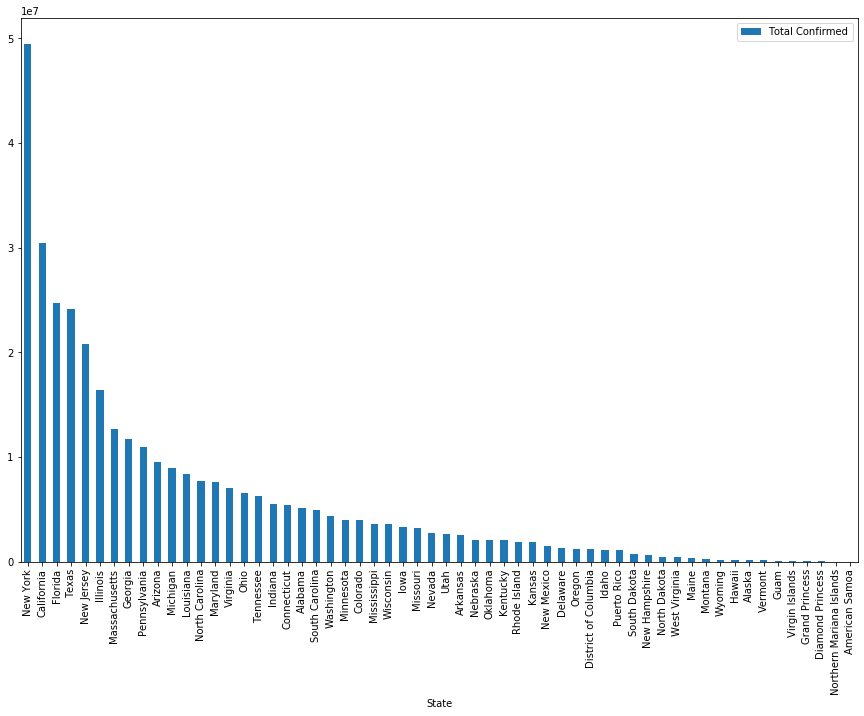

In [537]:
dflatest = dflatest.sort_values('Total Confirmed', ascending=False)
by_confirmed  = dflatest.plot.bar(x='State', y='Total Confirmed', figsize=(15,10))

In [538]:
statelist = dflatest['State'].tolist()
statelist_top10 =statelist[:10]
print(statelist_top10)

['New York', 'California', 'Florida', 'Texas', 'New Jersey', 'Illinois', 'Massachusetts', 'Georgia', 'Pennsylvania', 'Arizona']


In [539]:
uscovid_Top10 = uscovid[uscovid['State'].isin(statelist_top10)]
uscovid_Top10

,State,County,Date,Confirmed,Dead,Population,Total Confirmed,Total Dead
101,Arizona,Apache,2020-01-22,0,0,7278717.0,9509622,221690
102,Arizona,Cochise,2020-01-22,0,0,7278717.0,9509622,221690
103,Arizona,Coconino,2020-01-22,0,0,7278717.0,9509622,221690
104,Arizona,Gila,2020-01-22,0,0,7278717.0,9509622,221690
105,Arizona,Graham,2020-01-22,0,0,7278717.0,9509622,221690
...,...,...,...,...,...,...,...,...
704349,Texas,Wood,2020-08-19,373,12,28995881.0,24089747,437938
704350,Texas,Yoakum,2020-08-19,129,3,28995881.0,24089747,437938
704351,Texas,Young,2020-08-19,203,6,28995881.0,24089747,437938
704352,Texas,Zapata,2020-08-19,231,3,28995881.0,24089747,437938


In [541]:
import pandas as pd
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'